In [64]:
import os
import matplotlib.pyplot as plt

In [65]:
def read_cpu_load(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        cpu_loads = [float(line.strip().split('CPU_load:')[1].strip('%')) for line in lines]
    return cpu_loads

In [66]:
file_names = ['idle.txt','temp.txt', 'humidity.txt', 'pressure.txt', 'humidAndpress.txt', 'TandH.txt','tempandpressure.txt', 'all.txt']
sensor_names = ['Idle', 'Temperature On', 'Humidity On', 'Pressure On', 'Humidity and Pressure On', 'Temperature and Humidity On', 'Temperature and Pressure On', 'All Sensors On']

In [67]:
cpu_loads_avg = []
cpu_loads_min = []
cpu_loads_max = []

In [68]:
idle_power = 540  # Idle power consumption in mA
max_power = 1280  # Maximum power consumption in mA
estimated_powers_avg = []
estimated_powers_min = []
estimated_powers_max = []

In [69]:
for file_name in file_names:
    cpu_loads = read_cpu_load(file_name)
    
    cpu_loads_avg.append(round(sum(cpu_loads) / len(cpu_loads), 2))
    cpu_loads_min.append(round(min(cpu_loads), 2))
    cpu_loads_max.append(round(max(cpu_loads), 2))
    
    
    estimated_power_avg = idle_power + (max_power - idle_power) * (cpu_loads_avg[-1] / 100)
    estimated_powers_avg.append(round(estimated_power_avg, 2))
    
    estimated_power_min = idle_power + (max_power - idle_power) * (cpu_loads_min[-1] / 100)
    estimated_powers_min.append(round(estimated_power_min, 2))
    
    estimated_power_max = idle_power + (max_power - idle_power) * (cpu_loads_max[-1] / 100)
    estimated_powers_max.append(round(estimated_power_max, 2))

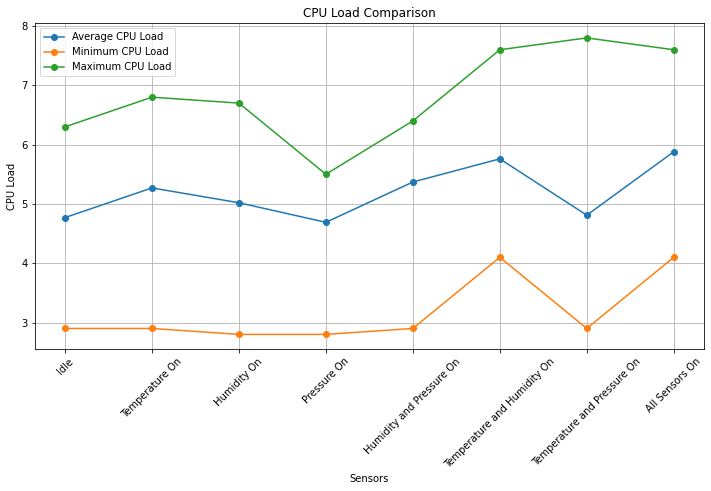

In [70]:
plt.figure(figsize=(12, 6))
x = range(len(sensor_names))
plt.plot(x, cpu_loads_avg, label='Average CPU Load', marker='o')
plt.plot(x, cpu_loads_min, label='Minimum CPU Load', marker='o')
plt.plot(x, cpu_loads_max, label='Maximum CPU Load', marker='o')

plt.xlabel('Sensors')
plt.ylabel('CPU Load')
plt.title('CPU Load Comparison')
plt.xticks(x, sensor_names, rotation=45)
plt.legend()
plt.grid(True)  # Add gridlines
plt.show()

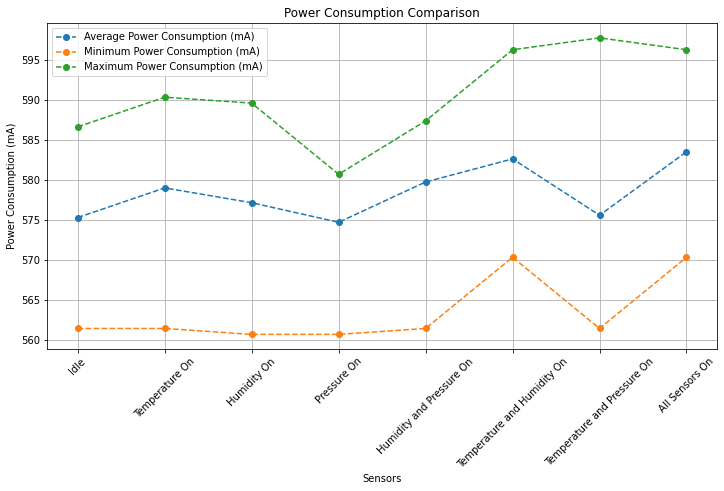

In [71]:
plt.figure(figsize=(12, 6))
x = range(len(sensor_names))

# Average, Minimum, and Maximum power consumption
plt.plot(x, estimated_powers_avg, label='Average Power Consumption (mA)', linestyle='--', marker='o')
plt.plot(x, estimated_powers_min, label='Minimum Power Consumption (mA)', linestyle='--', marker='o')
plt.plot(x, estimated_powers_max, label='Maximum Power Consumption (mA)', linestyle='--', marker='o')

plt.xlabel('Sensors')
plt.ylabel('Power Consumption (mA)')
plt.title('Power Consumption Comparison')
plt.xticks(x, sensor_names, rotation=45)
plt.legend()
plt.grid(True)  # Add gridlines
plt.show()

In [72]:
data_all = read_cpu_load("load_data_all.txt")
hours = len(data_all) / 6  # Each data point is collected every 10 minutes (6 data points per hour)

In [73]:
def analyze_changes(data, interval):
    analyzed_data = []
    num_points = len(data)
    num_intervals = num_points // interval

    for i in range(num_intervals):
        start_index = i * interval
        end_index = (i + 1) * interval
        interval_data = data[start_index:end_index]
        change = interval_data[-1] - interval_data[0]
        analyzed_data.append(change)

    return analyzed_data

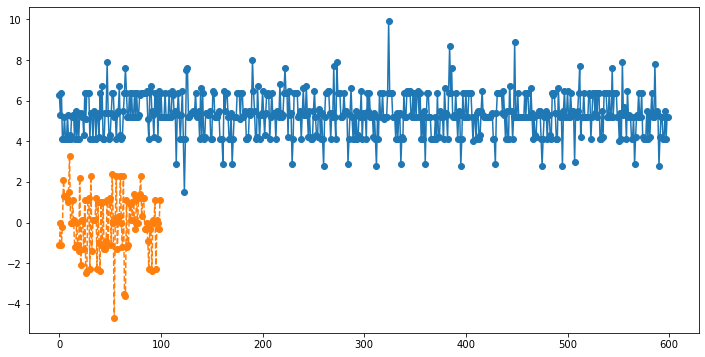

In [74]:
# Read the 10-hour data
data_all = read_cpu_load("load_data_all.txt")
hours = len(data_all) / 6  # Each data point is collected every 10 minutes (6 data points per hour)

# Analyze changes for every 60 minutes
interval_minutes = 60
interval_points = interval_minutes // 10  # Each data point is collected every 10 minutes
changes = analyze_changes(data_all, interval_points)

# Calculate 30-minute average, minimum, and maximum
interval_minutes_30 = 30
interval_points_30 = interval_minutes_30 // 10  # Each data point is collected every 10 minutes
data_avg_30 = [sum(data_all[i:i+interval_points_30]) / interval_points_30 for i in range(0, len(data_all), interval_points_30)]
data_min_30 = [min(data_all[i:i+interval_points_30]) for i in range(0, len(data_all), interval_points_30)]
data_max_30 = [max(data_all[i:i+interval_points_30]) for i in range(0, len(data_all), interval_points_30)]

# Create the graph
plt.figure(figsize=(12, 6))

# Plot the 10-hour data with changes analyzed for every 60 minutes
x_all = range(len(data_all))
x_60min = range(len(changes))
plt.plot(x_all, data_all, label='10-Hour Data', linestyle='-', marker='o')
plt.plot(x_60min, changes, label='Changes (60-Minute Intervals)', linestyle='--', marker='o')


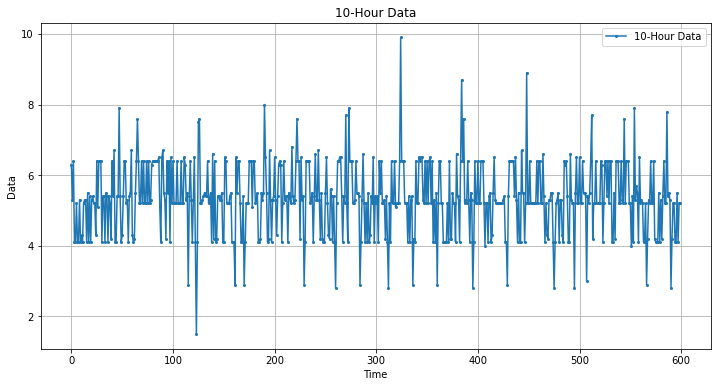

In [75]:
# Create the graph
plt.figure(figsize=(12, 6))

# Plot the 10-hour data
x_all = range(len(data_all))
plt.plot(x_all, data_all, label='10-Hour Data', linestyle='-', marker='o', markersize=2)

plt.xlabel('Time')
plt.ylabel('Data')
plt.title('10-Hour Data')
plt.legend()
plt.grid(True)  # Add gridlines
plt.show()

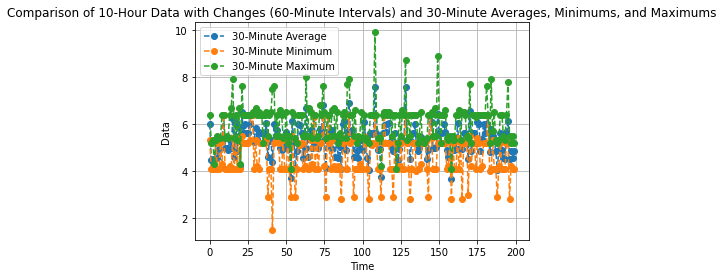

In [76]:
# Plot the 30-minute average, minimum, and maximum
x_30min = range(len(data_avg_30))
plt.plot(x_30min, data_avg_30, label='30-Minute Average', linestyle='--', marker='o')
plt.plot(x_30min, data_min_30, label='30-Minute Minimum', linestyle='--', marker='o')
plt.plot(x_30min, data_max_30, label='30-Minute Maximum', linestyle='--', marker='o')

plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Comparison of 10-Hour Data with Changes (60-Minute Intervals) and 30-Minute Averages, Minimums, and Maximums')
plt.legend()
plt.grid(True)  # Add gridlines
plt.show()

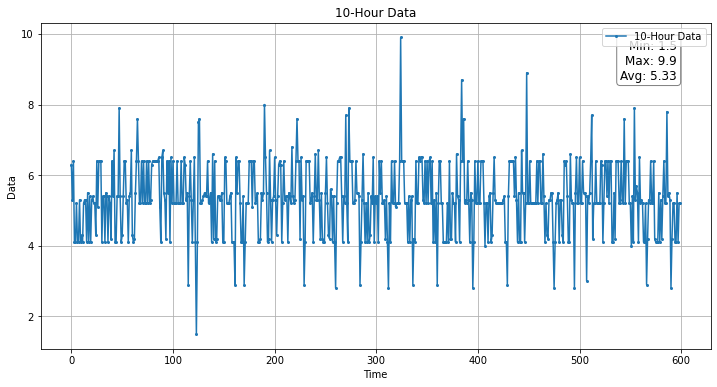

In [77]:
data_all = read_cpu_load("load_data_all.txt")

data_min = min(data_all)
data_max = max(data_all)
data_avg = sum(data_all) / len(data_all)

# Create the graph
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the 10-hour data
x_all = range(len(data_all))
ax.plot(x_all, data_all, label='10-Hour Data', linestyle='-', marker='o', markersize=2)

ax.set_xlabel('Time')
ax.set_ylabel('Data')
ax.set_title('10-Hour Data')
ax.legend()
ax.grid(True)  # Add gridlines

# Add text box for minimum, maximum, and average values
textbox_text = f"Min: {data_min}\nMax: {data_max}\nAvg: {data_avg:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.95, 0.95, textbox_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.show()

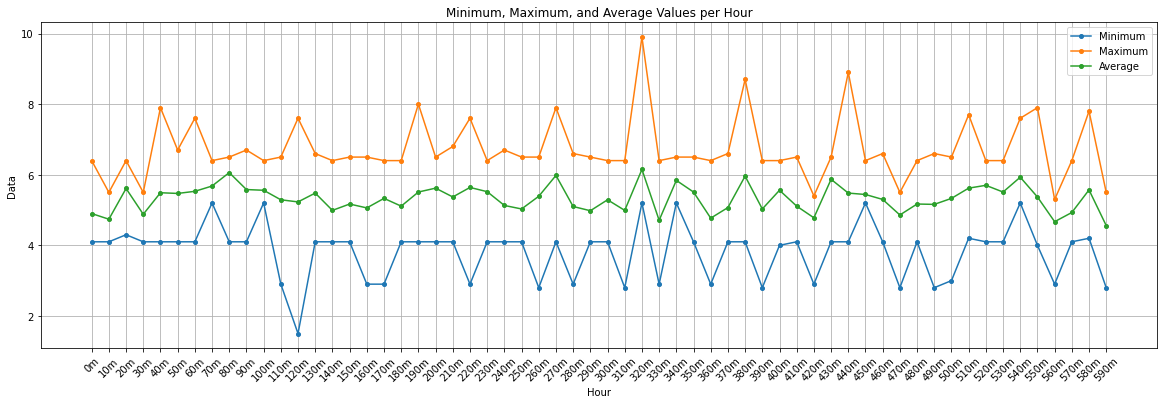

In [78]:
# Calculate the minimum, maximum, and average values for every hour
interval_minutes = 60
interval_points = interval_minutes // 6  # Each data point is collected every 10 minutes
num_intervals = len(data_all) // interval_points

data_min_hourly = []
data_max_hourly = []
data_avg_hourly = []

for i in range(num_intervals):
    start_index = i * interval_points
    end_index = (i + 1) * interval_points
    interval_data = data_all[start_index:end_index]
    data_min_hourly.append(min(interval_data))
    data_max_hourly.append(max(interval_data))
    data_avg_hourly.append(sum(interval_data) / len(interval_data))

# Create the graph
plt.figure(figsize=(20, 6))

# Plot the minimum, maximum, and average values for every hour
x_hourly = range(num_intervals)
plt.plot(x_hourly, data_min_hourly, label='Minimum', linestyle='-', marker='o', markersize=4)
plt.plot(x_hourly, data_max_hourly, label='Maximum', linestyle='-', marker='o', markersize=4)
plt.plot(x_hourly, data_avg_hourly, label='Average', linestyle='-', marker='o', markersize=4)

plt.xlabel('Hour')
plt.ylabel('Data')
plt.title('Minimum, Maximum, and Average Values per Hour')
plt.legend()
plt.grid(True)  # Add gridlines
plt.xticks(x_hourly, [f'{i*10}m' for i in range(num_intervals)], rotation=45)  # Set x-axis labels as every 30 minutes with rotation
 # Set x-axis labels as hours

plt.show()

In [79]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv("latencies.csv")
df2 = pd.read_csv("latencies2.csv")
df3 = pd.read_csv("latencies3.csv")

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Group the data by sensor_id and calculate statistics
grouped = df.groupby("sensor_id")
min_latency = grouped["latency"].min()
max_latency = grouped["latency"].max()
avg_latency = grouped["latency"].mean()
median_latency = grouped["latency"].median()
std_dev_latency = grouped["latency"].std()

# Display the analysis results
print("Analysis of Latency Data:")
print("-------------------------")

print("\nMinimum Latency:")
print(min_latency)

print("\nMaximum Latency:")
print(max_latency)

print("\nAverage Latency:")
print(avg_latency)

print("\nMedian Latency:")
print(median_latency)

print("\nStandard Deviation of Latency:")
print(std_dev_latency)


Analysis of Latency Data:
-------------------------

Minimum Latency:
sensor_id
humidity       0.019749
pressure       0.018216
temperature    0.026413
Name: latency, dtype: float64

Maximum Latency:
sensor_id
humidity       1.362612
pressure       1.242418
temperature    1.324282
Name: latency, dtype: float64

Average Latency:
sensor_id
humidity       0.636828
pressure       0.624215
temperature    0.350064
Name: latency, dtype: float64

Median Latency:
sensor_id
humidity       1.052458
pressure       0.382827
temperature    0.239005
Name: latency, dtype: float64

Standard Deviation of Latency:
sensor_id
humidity       0.505929
pressure       0.502297
temperature    0.389783
Name: latency, dtype: float64


--------------------------
Analysis of Latency Data From First file:

Minimum Latency:
sensor_id
temperature    0.031985
Name: latency, dtype: float64

Maximum Latency:
sensor_id
temperature    0.408664
Name: latency, dtype: float64

Average Latency:
sensor_id
temperature    0.178989
Name: latency, dtype: float64


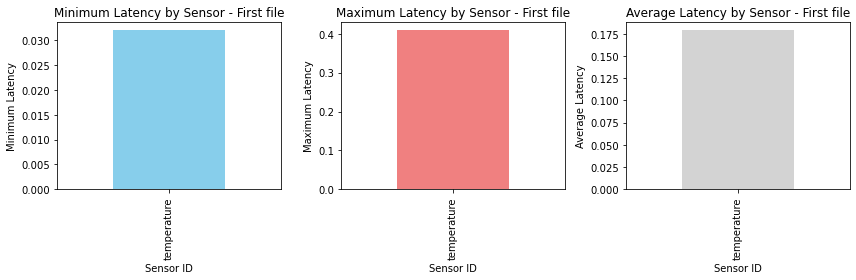

--------------------------
Analysis of Latency Data From Second file:

Minimum Latency:
sensor_id
humidity       0.036892
temperature    0.035902
Name: latency, dtype: float64

Maximum Latency:
sensor_id
humidity       1.303468
temperature    1.273274
Name: latency, dtype: float64

Average Latency:
sensor_id
humidity       0.642876
temperature    0.509781
Name: latency, dtype: float64


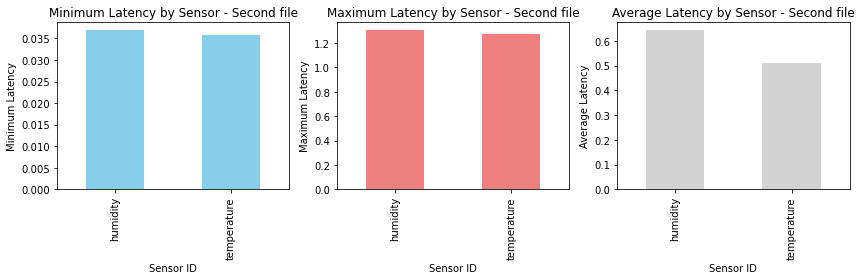

--------------------------
Analysis of Latency Data From Third file:

Minimum Latency:
sensor_id
humidity       0.019749
pressure       0.018216
temperature    0.026413
Name: latency, dtype: float64

Maximum Latency:
sensor_id
humidity       1.362612
pressure       1.242418
temperature    1.324282
Name: latency, dtype: float64

Average Latency:
sensor_id
humidity       0.627772
pressure       0.624215
temperature    0.623281
Name: latency, dtype: float64


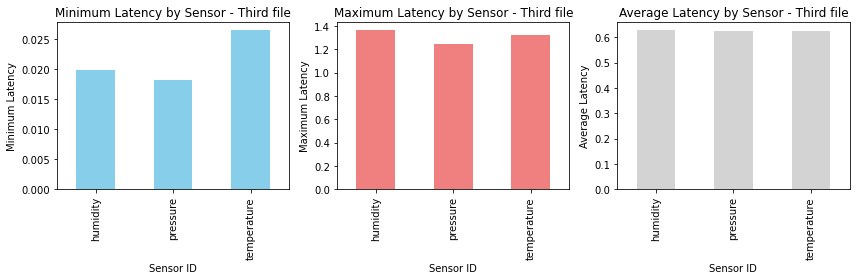

Comparison of Latency Data:
---------------------------

Minimum Latency:
sensor_id
humidity       0.019749
pressure       0.018216
temperature    0.026413
Name: latency, dtype: float64

Maximum Latency:
sensor_id
humidity       1.362612
pressure       1.242418
temperature    1.324282
Name: latency, dtype: float64

Average Latency:
sensor_id
humidity       0.636828
pressure       0.624215
temperature    0.350064
Name: latency, dtype: float64


: 

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
df1 = pd.read_csv("latencies.csv")
df2 = pd.read_csv("latencies2.csv")
df3 = pd.read_csv("latencies3.csv")

# Merge all files on sensor_id
merged = pd.concat([df1, df2, df3])

# Group the data by sensor_id and calculate statistics
grouped = merged.groupby("sensor_id")
min_latency = grouped["latency"].min()
max_latency = grouped["latency"].max()
avg_latency = grouped["latency"].mean()

# Function to print latency analysis for a specific file
def print_latency_analysis(file_name, df):
    print("--------------------------")
    print(f"Analysis of Latency Data From {file_name}:")
    print("\nMinimum Latency:")
    print(df.groupby("sensor_id")["latency"].min())

    print("\nMaximum Latency:")
    print(df.groupby("sensor_id")["latency"].max())

    print("\nAverage Latency:")
    print(df.groupby("sensor_id")["latency"].mean())

    # Plot latency data
    plt.figure(figsize=(12, 4))

    # Plot minimum latency
    plt.subplot(1, 3, 1)
    min_latencies = df.groupby("sensor_id")["latency"].min()
    min_latencies.plot(kind="bar", color='skyblue')
    plt.xlabel("Sensor ID")
    plt.ylabel("Minimum Latency")
    plt.title(f"Minimum Latency by Sensor - {file_name}")

    # Plot maximum latency
    plt.subplot(1, 3, 2)
    max_latencies = df.groupby("sensor_id")["latency"].max()
    max_latencies.plot(kind="bar", color='lightcoral')
    plt.xlabel("Sensor ID")
    plt.ylabel("Maximum Latency")
    plt.title(f"Maximum Latency by Sensor - {file_name}")

    # Plot average latency
    plt.subplot(1, 3, 3)
    avg_latencies = df.groupby("sensor_id")["latency"].mean()
    avg_latencies.plot(kind="bar", color='lightgray')
    plt.xlabel("Sensor ID")
    plt.ylabel("Average Latency")
    plt.title(f"Average Latency by Sensor - {file_name}")

    plt.tight_layout()
    plt.show()

# Print latency analysis and plot graphs for each file
print_latency_analysis("First file", df1)
print_latency_analysis("Second file", df2)
print_latency_analysis("Third file", df3)

# Display the comparison results
print("Comparison of Latency Data:")
print("---------------------------")

print("\nMinimum Latency:")
print(min_latency)

print("\nMaximum Latency:")
print(max_latency)

print("\nAverage Latency:")
print(avg_latency)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
data1 = pd.read_csv('latencies3.csv')
data2 = pd.read_csv('latencies4.csv')

# Calculate average, minimum, and maximum values based on sensor ID for file 1
avg_data1 = data1.groupby('sensor_id')['value'].mean()
min_data1 = data1.groupby('sensor_id')['value'].min()
max_data1 = data1.groupby('sensor_id')['value'].max()

# Calculate average, minimum, and maximum values based on sensor ID for file 2
avg_data2 = data2.groupby('sensor_id')['value'].mean()
min_data2 = data2.groupby('sensor_id')['value'].min()
max_data2 = data2.groupby('sensor_id')['value'].max()

# Plot the comparison graph
plt.figure(figsize=(10, 6))
plt.plot(avg_data1.index, avg_data1, label='File 1 (Average)')
plt.plot(min_data1.index, min_data1, label='File 1 (Minimum)')
plt.plot(max_data1.index, max_data1, label='File 1 (Maximum)')
plt.plot(avg_data2.index, avg_data2, label='File 2 (Average)')
plt.plot(min_data2.index, min_data2, label='File 2 (Minimum)')
plt.plot(max_data2.index, max_data2, label='File 2 (Maximum)')
plt.xlabel('Sensor ID')
plt.ylabel('Value')
plt.title('Sensor Data Comparison')
plt.legend()
plt.grid(True)
plt.show()
